In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

import os
import cv2
import sys
root_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..'))
sys.path.append(root_dir)
import matplotlib.pyplot as plt

from torchsat.models.utils import get_model
import torchsat.transforms.transforms_seg as T_seg
from torchsat.datasets.folder import SegmentationDataset
from torchsat.models.segmentation import unet_v2
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from ignite.metrics import IoU, Precision, Recall # from pytorch-ignite


device = 'cpu'
torch.backends.cudnn.benchmark = True


In [18]:
image_path = r"D:\Projects\torchsat\datasets\images\1110.tif"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

mean = np.mean(image, axis=(0,1), keepdims=True)
std = np.std(image, axis=(0,1), keepdims=True)
print(mean/255)
print(std/255)

(581, 899, 3)
[[[0.34412036 0.36172597 0.32255994]]]
[[[0.15378592 0.13528091 0.14353549]]]


In [8]:
model = "unet34"
model_path = r"D:\Projects\torchsat\checkpoints\cls_epoch_33.pth"
num_classes = 2

# model
model = get_model(model, num_classes)
model.to(device)
model.load_state_dict(torch.load(model_path))
model.eval();

{}


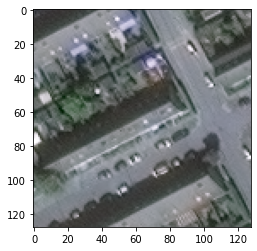

torch.Size([1, 3, 128, 128])
tensor(2.6400)
torch.Size([1, 2, 128, 128])


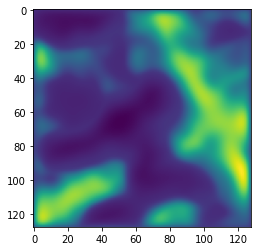

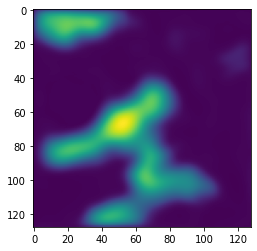

In [9]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = r"D:\Projects\torchsat\datasets\temp\val\image\1110_3_5.tif"
image = cv2.imread(filename)
plt.imshow(image)
plt.show()


val_transform = T_seg.Compose([
    T_seg.ToTensor(),
    T_seg.Normalize(),
])

image, _ = val_transform(image, np.zeros(image.shape))
image = torch.unsqueeze(image, 0)

print(image.shape)
print(image.max())

output = model(image)

print(output.shape)

rgb_output = np.zeros((3, 128, 128))
rgb_output[:2, :, :] = output.squeeze(0).detach().numpy()
rgb_output = rgb_output.transpose(1, 2, 0)

plt.imshow(rgb_output[:, :, 0])
plt.show()
plt.imshow(rgb_output[:, :, 1])
plt.show()



